In [1]:
!git clone https://github.com/omkar-salunke/ML-based-human-driving-behavior-recognition-and-prediction.git

Cloning into 'ML-based-human-driving-behavior-recognition-and-prediction'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 1844 (delta 2), reused 0 (delta 0), pack-reused 1836
Receiving objects: 100% (1844/1844), 30.95 MiB | 31.95 MiB/s, done.
Resolving deltas: 100% (211/211), done.


In [3]:
!pip install hmmlearn

     |████████████████████████████████| 153kB 3.3MB/s 
  Created wheel for hmmlearn: filename=hmmlearn-0.2.2-cp27-cp27mu-linux_x86_64.whl size=189233 sha256=6b4dd21d2e79c5f3040df12e2499a6269524e4e5335e28eb26384b4aee82e9c6
  Stored in directory: /root/.cache/pip/wheels/2c/b6/0e/63a865a30e21e01d04f417d8995fbfb793d6bd464707efc546
Successfully built hmmlearn


In [4]:
from hmmlearn import hmm
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data1 = np.loadtxt('ML-based-human-driving-behavior-recognition-and-prediction/data/data-merging/all_trajs_1.txt')
data2 = np.loadtxt('ML-based-human-driving-behavior-recognition-and-prediction/data/data-merging/all_trajs_2.txt')
len1 = np.loadtxt('ML-based-human-driving-behavior-recognition-and-prediction/data/data-merging/all_trajs_seq_length_1.txt')
len2 = np.loadtxt('ML-based-human-driving-behavior-recognition-and-prediction/data/data-merging/all_trajs_seq_length_2.txt')

In [8]:
hmm_1 = hmm.GaussianHMM(n_components=26, covariance_type="full", n_iter=1000, verbose = True,  algorithm = 'map')
hmm_2 = hmm.GaussianHMM(n_components=26, covariance_type="full", n_iter=1000, verbose = True, algorithm = 'map')

In [9]:
X1 = data1[0:, [3, 5, 7, 9, 10, 11, 12]]
X2 = data2[0:, [3, 5, 7, 9, 10, 11, 12]]
len1 = len1.astype(int)
len2 = len2.astype(int)

In [10]:
hmm_1.fit(X1, (len1))
hmm_2.fit(X2, (len2))

         1      -47503.7551             +nan
         2        4967.9871      +52471.7422
         3       18598.3723      +13630.3851
         4       26926.7408       +8328.3686
         5       32009.9229       +5083.1821
         6       34541.5696       +2531.6467
         7       36313.0434       +1771.4739
         8       37909.4196       +1596.3761
         9       38586.8788        +677.4592
        10       38819.0421        +232.1633
        11       39025.4414        +206.3993
        12       39122.1678         +96.7264
        13       39222.6185        +100.4508
        14       39284.0798         +61.4612
        15       39312.1947         +28.1149
        16       39329.7752         +17.5805
        17       39341.6571         +11.8819
        18       39357.5352         +15.8781
        19       39373.2869         +15.7517
        20       39384.7116         +11.4247
        21       39391.8038          +7.0922
        22       39397.9495          +6.1457
        23

GaussianHMM(algorithm='map', covariance_type='full', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=26, n_iter=1000, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=True)

In [11]:
hmm_2.score(X1[0:len1[0], :])

-1994.9165647355844

In [12]:
def calc_like(X1):
    score1 = hmm_1.score(X1)
    score2 = hmm_2.score(X1)
    
    score1 = np.exp(score1) / (np.exp(score1) + np.exp(score2))
    score2 = 1 - score1
    return score1, score2

In [14]:
N = 100
lower = 0
test = np.loadtxt('ML-based-human-driving-behavior-recognition-and-prediction/data/data-merging/test.txt')
prob = np.zeros((N, 1))
X1_0 = test[:, [3, 5, 7, 9, 10, 11, 12]]
print (X1_0.shape)
for t in range(N):
    upper  = lower + 50
    X_seq = X1_0[lower:upper, :]
    prob[t,:], _ = calc_like(X_seq)
    lower += 1

(164, 7)


In [15]:
prob

array([[4.21001780e-033],
       [3.15151196e-035],
       [7.91560971e-038],
       [9.86721201e-041],
       [1.08672463e-043],
       [7.83929562e-047],
       [2.08330299e-050],
       [1.88094392e-054],
       [2.86370457e-058],
       [4.10691164e-061],
       [9.60362248e-064],
       [2.69108040e-066],
       [9.43304099e-069],
       [3.50138413e-071],
       [1.39465811e-073],
       [5.46345087e-076],
       [2.06179424e-078],
       [7.14519883e-081],
       [2.29746742e-083],
       [6.67226665e-086],
       [1.87776491e-088],
       [4.97799275e-091],
       [1.17298172e-093],
       [2.33252293e-096],
       [3.76463881e-099],
       [5.07551246e-102],
       [5.33844584e-105],
       [4.43456435e-108],
       [2.91891491e-111],
       [1.62171841e-114],
       [7.85794549e-118],
       [3.94316110e-121],
       [1.98950438e-124],
       [1.09154582e-127],
       [6.20680176e-131],
       [4.09743423e-134],
       [1.12081218e-135],
       [4.71049710e-139],
       [5.65

(100, 1)


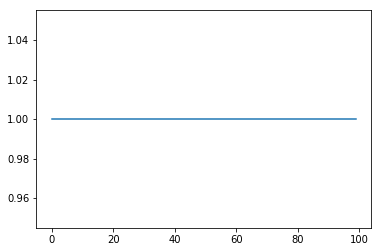

In [16]:
print(prob.shape)
plt.plot(1 - prob)
plt.show()

In [17]:
data1[0, :]

array([ 0.000000e+00,  0.000000e+00, -6.442328e+02,  1.161000e+01,
       -6.075912e+02, -2.900000e-03, -6.628693e+02,  1.128200e+01,
       -6.156460e+02,  4.350000e-02, -3.280000e-01, -8.054800e+00,
       -1.863650e+01,  7.058000e-01,  7.058000e-01,  0.000000e+00])